In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations. Creates arrays into a tuple accessible by index.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(66.44243722693679, 46.377076259069895),
 (-71.24929660229964, 70.04332173686973),
 (25.46462210668362, 19.209076021287927),
 (-23.617966935410422, 83.36662982025075),
 (45.662797188977834, -68.57980173361305),
 (-53.011090150342454, -0.2945902876339517),
 (36.34144171245951, 110.30215093665493),
 (86.06697613109381, -88.87393395388341),
 (24.99009434647978, 12.648589725314508),
 (-68.68693402838036, 108.29461215405439),
 (50.236416919636326, -101.16943899183943),
 (89.97022421241181, 36.12938139270602),
 (-12.565047581042535, -143.5413610969754),
 (-44.381475589125806, -56.42919194469424),
 (5.6776966502768715, 79.43585951804499),
 (53.684717091555086, -25.21273930850967),
 (-23.11183288671438, -85.93252948163135),
 (-27.031599726173567, 56.069896774582844),
 (33.34880571816255, -93.14261961155643),
 (52.626898438332944, -140.47900135199984),
 (-48.23428892892907, 43.38942869444827),
 (-28.807648338836067, 164.43358507631297),
 (49.04425653302397, 45.72366750199487),
 (17.58961022638

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
# url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid="+ weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | leshukonskoye
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | awjilah
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | millinocket
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | yanan
City not found. Skipping...
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | marzuq
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | virden
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | necochea
Processing Record 15 of Set 1 | galle
Processing Record 16 of Set 1 | grindavik
Processing Record 17 of Set 1 | marcona
City not found. Skipping...
Processing Record 18 of Set 1 | saint-joseph
Processing Record 19 of Set 1 | magnolia
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 22 of Set 1 | noumea
Pro

Processing Record 38 of Set 4 | jasper
Processing Record 39 of Set 4 | el bagre
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | stornoway
Processing Record 42 of Set 4 | yaan
Processing Record 43 of Set 4 | cochrane
Processing Record 44 of Set 4 | grootfontein
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | darnah
Processing Record 48 of Set 4 | youghal
Processing Record 49 of Set 4 | meyungs
City not found. Skipping...
Processing Record 50 of Set 4 | charlestown
Processing Record 1 of Set 5 | carballo
Processing Record 2 of Set 5 | bandarbeyla
Processing Record 3 of Set 5 | new norfolk
Processing Record 4 of Set 5 | chake chake
Processing Record 5 of Set 5 | boden
Processing Record 6 of Set 5 | haines junction
Processing Record 7 of Set 5 | nyurba
Processing Record 8 of Set 5 | atbasar
Processing Record 9 of Set 5 | nioaque
Processing Record 10 of Set 5 | bellefonta

Processing Record 24 of Set 8 | morant bay
Processing Record 25 of Set 8 | kalabo
Processing Record 26 of Set 8 | kidal
Processing Record 27 of Set 8 | krasnoselkup
Processing Record 28 of Set 8 | manaus
Processing Record 29 of Set 8 | ginda
Processing Record 30 of Set 8 | chingirlau
Processing Record 31 of Set 8 | aras
Processing Record 32 of Set 8 | mount gambier
Processing Record 33 of Set 8 | hanyang
Processing Record 34 of Set 8 | bossier city
Processing Record 35 of Set 8 | quincy
Processing Record 36 of Set 8 | hasaki
Processing Record 37 of Set 8 | mocajuba
Processing Record 38 of Set 8 | lagoa
Processing Record 39 of Set 8 | aiquile
Processing Record 40 of Set 8 | cermik
Processing Record 41 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | kerman
Processing Record 46 of Set 8 | namibe
Processing Record 47 of Set 8 | padang
Processing

Processing Record 15 of Set 12 | rungata
City not found. Skipping...
Processing Record 16 of Set 12 | rzhev
Processing Record 17 of Set 12 | presidencia roque saenz pena
Processing Record 18 of Set 12 | rock springs
Processing Record 19 of Set 12 | guerrero negro
Processing Record 20 of Set 12 | kamina
Processing Record 21 of Set 12 | san javier
Processing Record 22 of Set 12 | peniche
Processing Record 23 of Set 12 | escanaba
Processing Record 24 of Set 12 | maine-soroa
Processing Record 25 of Set 12 | providencia
Processing Record 26 of Set 12 | bud
Processing Record 27 of Set 12 | langres
Processing Record 28 of Set 12 | hofn
Processing Record 29 of Set 12 | vinh
Processing Record 30 of Set 12 | mikuni
Processing Record 31 of Set 12 | carson city
Processing Record 32 of Set 12 | the pas
Processing Record 33 of Set 12 | ziyang
Processing Record 34 of Set 12 | dargaville
Processing Record 35 of Set 12 | tecpan
Processing Record 36 of Set 12 | hoquiam
Processing Record 37 of Set 12 | k

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leshukonskoye,64.8989,45.7622,25.72,82,20,2.46,RU,2022-04-21 03:42:01
1,Awjilah,29.1081,21.2869,62.01,28,7,9.48,LY,2022-04-21 03:42:02
2,Hithadhoo,-0.6000,73.0833,82.98,69,70,5.08,MV,2022-04-21 03:42:02
3,Millinocket,45.6573,-68.7098,37.51,60,0,4.61,US,2022-04-21 03:42:03
4,Cape Town,-33.9258,18.4232,63.91,93,75,4.00,ZA,2022-04-21 03:42:03
5,Qaanaaq,77.4840,-69.3632,-10.34,88,98,7.63,GL,2022-04-21 03:42:04
6,Marzuq,14.4000,46.4667,72.66,15,0,4.52,YE,2022-04-21 03:42:04
7,Albany,42.6001,-73.9662,37.92,72,14,2.37,US,2022-04-21 03:37:26
8,Virden,39.5009,-89.7679,51.67,93,100,16.53,US,2022-04-21 03:39:04
9,Vardo,70.3705,31.1107,37.56,96,45,12.71,NO,2022-04-21 03:42:05


In [13]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leshukonskoye,RU,2022-04-21 03:42:01,64.8989,45.7622,25.72,82,20,2.46
1,Awjilah,LY,2022-04-21 03:42:02,29.1081,21.2869,62.01,28,7,9.48
2,Hithadhoo,MV,2022-04-21 03:42:02,-0.6000,73.0833,82.98,69,70,5.08
3,Millinocket,US,2022-04-21 03:42:03,45.6573,-68.7098,37.51,60,0,4.61
4,Cape Town,ZA,2022-04-21 03:42:03,-33.9258,18.4232,63.91,93,75,4.00
...,...,...,...,...,...,...,...,...,...
565,Cabedelo,BR,2022-04-21 03:57:54,-6.9811,-34.8339,77.67,86,28,8.66
566,Tambacounda,SN,2022-04-21 03:57:55,13.7539,-13.7586,86.05,32,0,6.91
567,Obihiro,JP,2022-04-21 03:57:55,42.9172,143.2044,74.61,22,2,6.13
568,Chornobayivka,UA,2022-04-21 03:57:55,46.6941,32.5537,42.42,90,98,7.02


In [2]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1650516447.98818

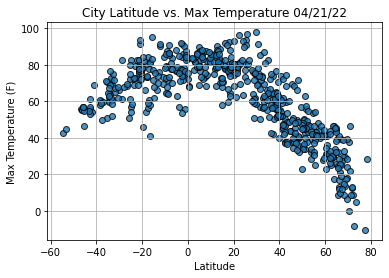

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

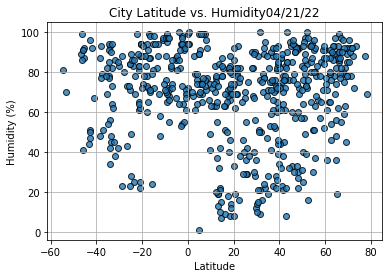

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


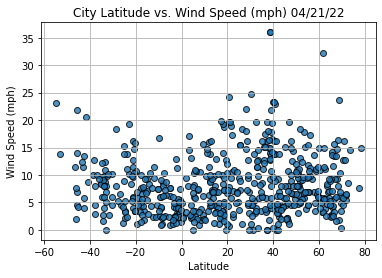

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


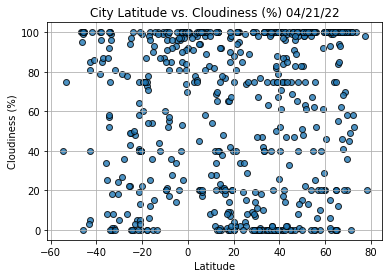

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Files to load
#city_data_to_load = "Resources/city_data.csv"
cities_data_to_load = "weather_data/cities.csv"

In [8]:
# Read the cities data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(cities_data_to_load)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Leshukonskoye,RU,2022-04-21 03:42:01,64.8989,45.7622,25.72,82,20,2.46
1,1,Awjilah,LY,2022-04-21 03:42:02,29.1081,21.2869,62.01,28,7,9.48
2,2,Hithadhoo,MV,2022-04-21 03:42:02,-0.6000,73.0833,82.98,69,70,5.08
3,3,Millinocket,US,2022-04-21 03:42:03,45.6573,-68.7098,37.51,60,0,4.61
4,4,Cape Town,ZA,2022-04-21 03:42:03,-33.9258,18.4232,63.91,93,75,4.00
5,5,Qaanaaq,GL,2022-04-21 03:42:04,77.4840,-69.3632,-10.34,88,98,7.63
6,6,Marzuq,YE,2022-04-21 03:42:04,14.4000,46.4667,72.66,15,0,4.52
7,7,Albany,US,2022-04-21 03:37:26,42.6001,-73.9662,37.92,72,14,2.37
8,8,Virden,US,2022-04-21 03:39:04,39.5009,-89.7679,51.67,93,100,16.53
9,9,Vardo,NO,2022-04-21 03:42:05,70.3705,31.1107,37.56,96,45,12.71


In [9]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Leshukonskoye,RU,2022-04-21 03:42:01,64.8989,45.7622,25.72,82,20,2.46
1,1,Awjilah,LY,2022-04-21 03:42:02,29.1081,21.2869,62.01,28,7,9.48
3,3,Millinocket,US,2022-04-21 03:42:03,45.6573,-68.7098,37.51,60,0,4.61
5,5,Qaanaaq,GL,2022-04-21 03:42:04,77.4840,-69.3632,-10.34,88,98,7.63
6,6,Marzuq,YE,2022-04-21 03:42:04,14.4000,46.4667,72.66,15,0,4.52


In [10]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [11]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

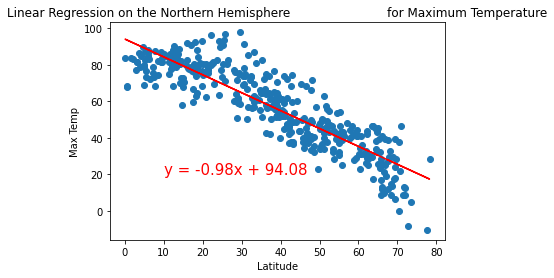

In [13]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

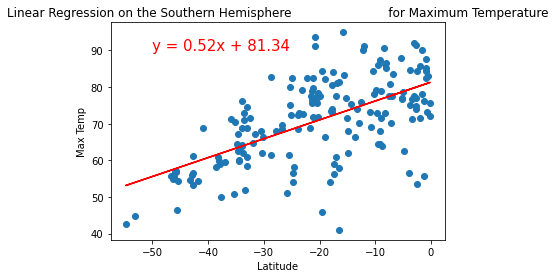

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

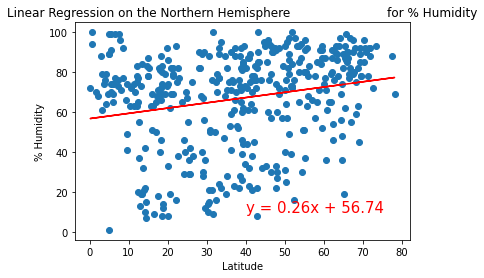

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

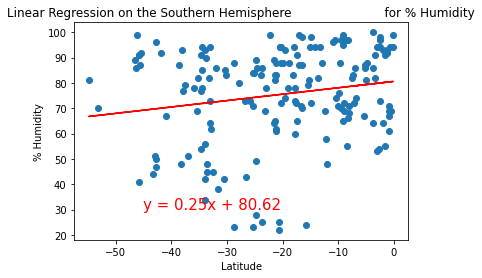

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Humidity', '% Humidity',(-45,30))

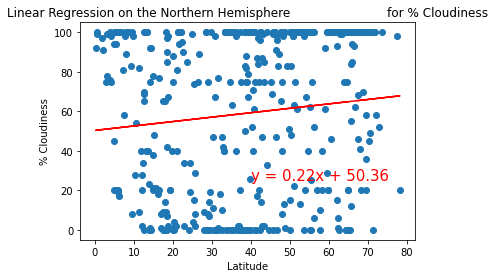

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,25))

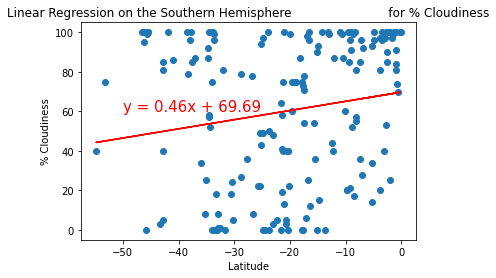

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

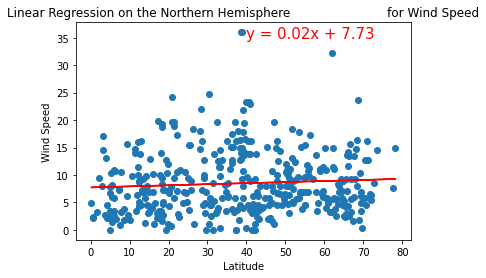

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

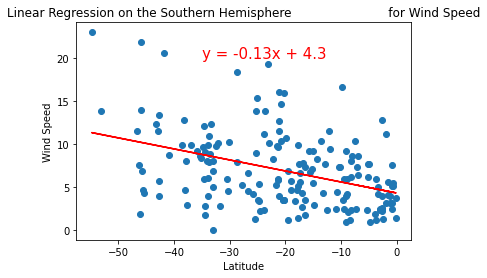

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-35,20))